In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
covid_data_pd = pd.read_csv('covid_data.csv', sep=',', header=None)
covid_data = np.array(covid_data_pd)
covid_data = np.delete(covid_data, 0, 0)

Y = covid_data[:, 4]
Y = Y.reshape(Y.shape[0], 1)
Y = Y.astype(np.int)
X = np.array(range(Y.shape[0]))
X = X.reshape(X.shape[0], 1)
X = X / max(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=20, shuffle=False)

In [ ]:
def compute_cost(n, Y, Yhat):
    cost = np.sum((Yhat - Y) ** 2) / (2. * n)
    return cost


def compute_Yhat(W, X, b):
    Yhat = np.zeros(X.shape)
    for i in range(W.shape[0]):
        Yhat = Yhat + W[i] * (X ** (i + 1))
    Yhat = Yhat + b
    return Yhat


def update_parameters(W, b, Y, Yhat, X, learning_rate, n):
    for i in range(W.shape[0]):
        dWi = np.sum((Yhat - Y) * (X ** (i + 1))) / (2 * n)
        # print(dWi)
        W[i] = W[i] - learning_rate * dWi

    db = (np.sum(Yhat - Y)) / n
    b = b - learning_rate * db
    return W, b


def predict(x, W, b):
    pred = 0
    for i in range(W.shape[0]):
        pred = pred + W[i] * (x ** (i + 1))
    pred = pred + b
    return pred

In [ ]:
def learn(X_train, Y_train, X_test, Y_test, lr, degree, its):
    b = 0
    W = np.random.rand((degree))
    iterations = its
    learning_rate = lr
    n = len(X_train)
    Yhat = Y_train
    for i in range(iterations):
        Yhat = compute_Yhat(W, X_train, b)
        J = compute_cost(n, Y_train, Yhat)
        # if (i % 2500 == 0):
        # print("Iteration #", i, ":")
        # print("J = ", J)
        # print()
        W, b = update_parameters(W, b, Y_train, Yhat, X_train, learning_rate, n)

    plt.figure()
    plt.subplot()
    plt.plot(X_train, Yhat, X_train, Y_train, 'ro')
    plt.suptitle(str(degree))
    plt.show()
    predicts = predict(X_test, W, b)
    err = mean_squared_error(Y_test, predicts)
    # print(err / 10000)
    return err, Yhat

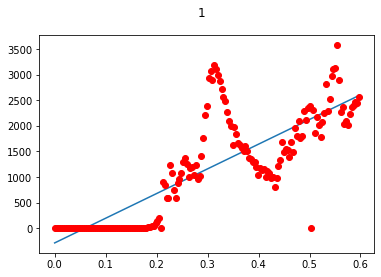

Degree =  1     Error =  1353169.887983246



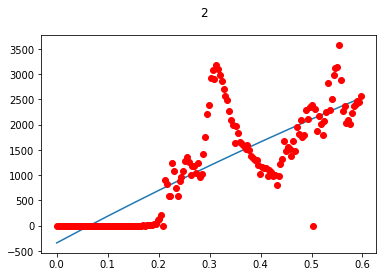

Degree =  2     Error =  866302.9821157183



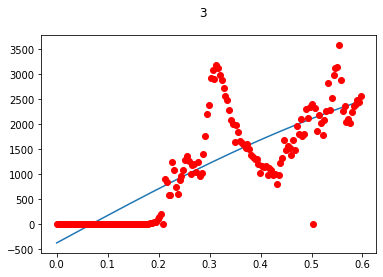

Degree =  3     Error =  369475.051396152



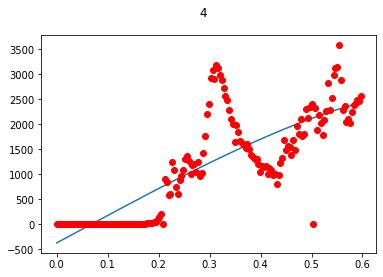

Degree =  4     Error =  342523.6024581279



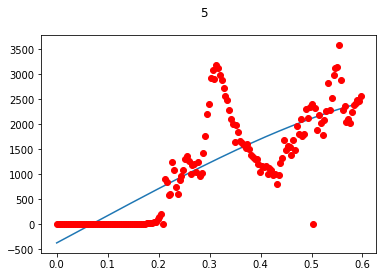

Degree =  5     Error =  444713.8841730324



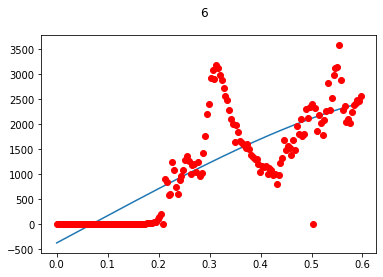

Degree =  6     Error =  523048.52652339934



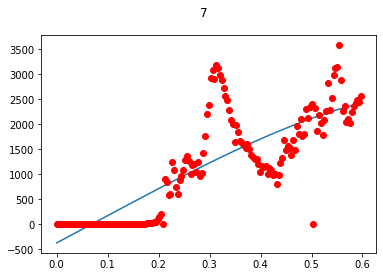

Degree =  7     Error =  558830.139597517



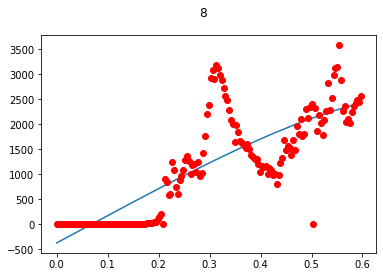

Degree =  8     Error =  570767.9648785997



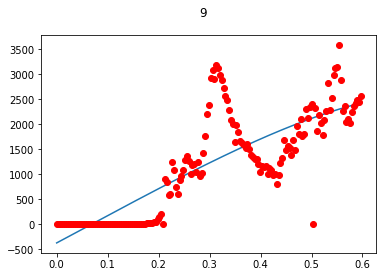

Degree =  9     Error =  571580.9226822185



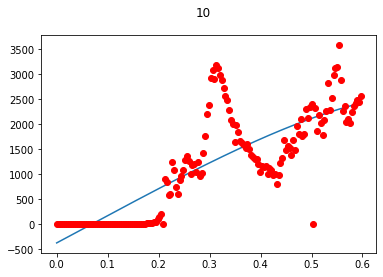

Degree =  10     Error =  569793.0722643123



In [ ]:
Yhat_final = Y_train
minErr = 1000000000
bestDegree = 1
for i in range(1, 11):
    error, Yhat = learn(X_train, Y_train, X_test, Y_test, lr=0.1, its=40000, degree=i)
    print("Degree = ", i, "    Error = ", error)
    print()
    if error < minErr:
        minErr = error
        bestDegree = i
        Yhat_final = Yhat



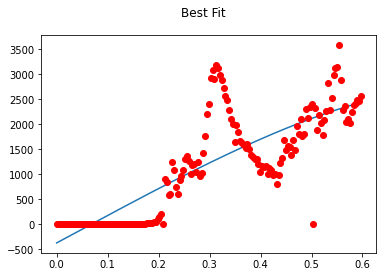

Best degree =  4
Error =  342523.6024581279


In [ ]:
plt.figure()
plt.subplot()
plt.plot(X_train, Yhat_final, X_train, Y_train, 'ro')
plt.suptitle("Best Fit")
plt.show()
print("Best degree = ", bestDegree)
print("Error = ", minErr)